# Exploring colour maps

We're going to look at applying colour maps in this section, and how to control the placement and location of a colour scale and legend on more complex plots.

As an example, we're going to use MOLA data of Mars [from the USGS Astropedia website](https://astropedia.astrogeology.usgs.gov/alfresco/faces/jsp/browse/browse.jsp).

We're also quickly goin to scale the image so that the greyscale values (from 0-255) reflect the topography in the mapped area (with reference to the aeroid, [see max and min elevation here](https://www.britannica.com/place/Mars-planet/Character-of-the-surface) - the Martian equivalent to the geoid).

In [12]:
# import required libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from PIL import Image

In [3]:
# set up a helper function to download an image from a url
def load_image_from_url(url):

    img = np.array(Image.open(requests.get(url, stream=True).raw))
    return img

In [30]:
# load in an image

jpg_image =load_image_from_url(
    "https://astropedia.astrogeology.usgs.gov/download/Mars/GlobalSurveyor/MOLA/thumbs/Mars_MGS_MOLA_DEM_mosaic_global_1024.jpg)")


In [7]:
jpg_image.shape

(501, 1024, 3)

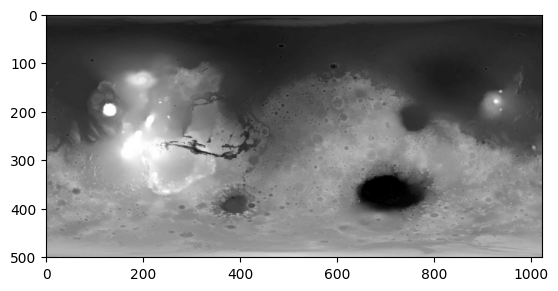

In [13]:
# let's do a very quick check of the data we've loaded in

plt.imshow(jpg_image)

In [14]:
# check if these channels hold different data
jpg_image[:,:,0] - jpg_image[:,:,2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
# select just a single layer of the data
image = jpg_image[:,:,0]

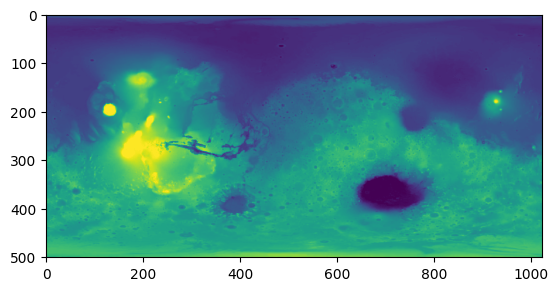

In [21]:
# create a simple plot
fig, ax = plt.subplots()
ax.imshow(image)

# now, we're plotting an array of values as opposed to a jpeg image

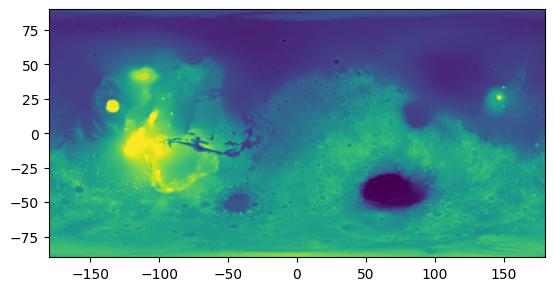

In [22]:
# let's scale the data correctly by setting the "extent" of the plot to
# the correct lat/long
# https://matplotlib.org/stable/users/explain/artists/imshow_extent.html

fig, ax = plt.subplots()
ax.imshow(image, ) # add extent here

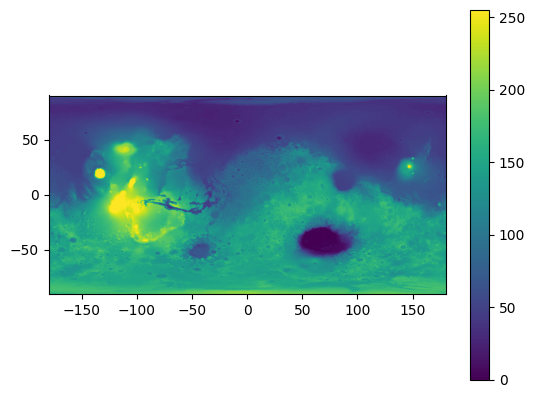

In [24]:
# let's add a colour scale

fig, ax = plt.subplots()
im = ax.imshow(image, extent=[-180, 180, -90, 90])


In general, when we create a figure object, with axes and a colorbar object, they are scaled appropriately so that the colorbar height matches the ax height. However, when working with an image using imshow, by default the aspect ratio of the image is maintained, so the image doesn't fill the axes provided, hence the colorbar sizing looks disproportionate.

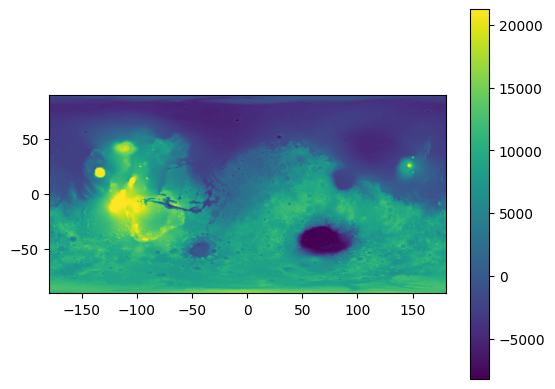

In [25]:
# we need to fix the layout and scale the data appropriately.
# we're going to leave the layout until last!
# let's scale the data first

image_scaled = ((21229+8200)*(image/255)) - 8200 # from 21 km above to 8 km below ref aeroid

fig, ax = plt.subplots()
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90])
fig.colorbar(im)

Text(0, 0.5, 'Latitude')

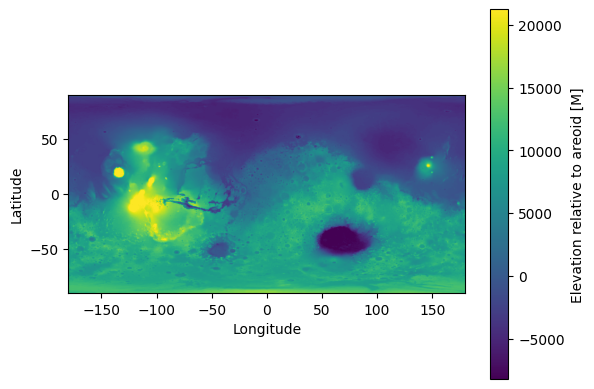

In [28]:
# let's add labels
# It's a good idea to add labels before tweaking the layout

fig, ax = plt.subplots()
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90])
fig.colorbar(im, label="Elevation relative to aeroid [M]")

ax.set_xlabel("Longitude [° E]")

# add a y label

### Fixing the colorbar size and location

There are a number of different ways we can work with the colour scale to make the plot look more appealing.

One option, which maintains the scalebars size (making it easier to read), is to rotate the colourbar to be horizontal.

Text(0, 0.5, 'Latitude [° N]')

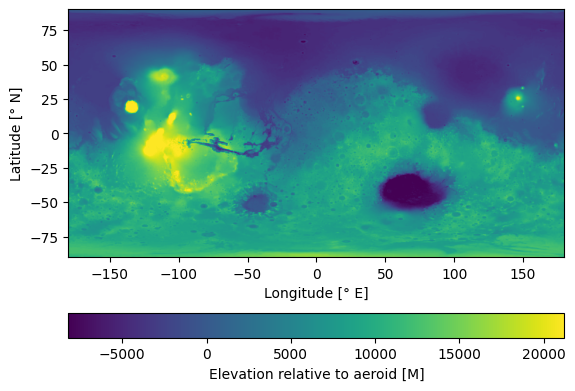

In [29]:
fig, ax = plt.subplots()
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90])

# rotate the colour scale
fig.colorbar(im, label="Elevation relative to aeroid [M]",
             orientation= )

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")

In this particular case, this has worked nicely; however we also want to be able to shrink it to fit alongside the plot if we wish.

Why does the colourbar nicely fit when in the horizontal orientation? (hint: let's look at the aspect ratio of the plot)



Text(0, 0.5, 'Latitude [° N]')

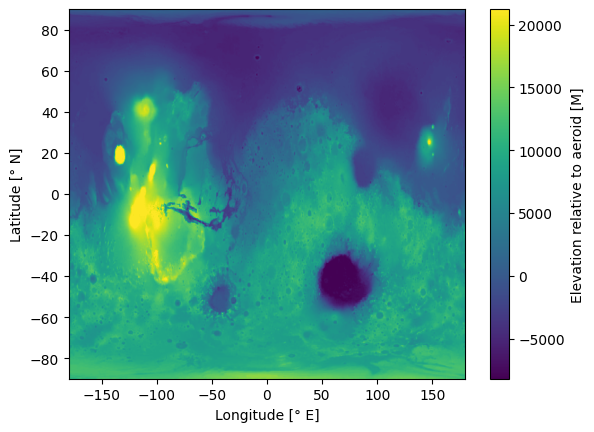

In [56]:
fig, ax = plt.subplots()
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90],
               aspect="auto")


fig.colorbar(im, label="Elevation relative to aeroid [M]",)

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")

Another (very manual) option is to shrink the colorbar until it fits more appropriately.

Text(0, 0.5, 'Latitude [° N]')

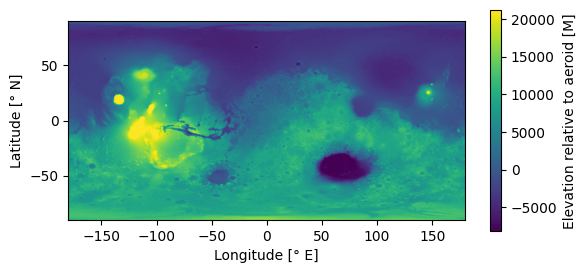

In [49]:
fig, ax = plt.subplots()
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90])

# shrink the colour scale - number between 0-1
fig.colorbar(im, label="Elevation relative to aeroid [M]",
             shrink=)

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")

Even when combined with the constrained layout option, which makes better use of the overall figure size, this approach is essentially guesswork.

Text(0, 0.5, 'Latitude [° N]')

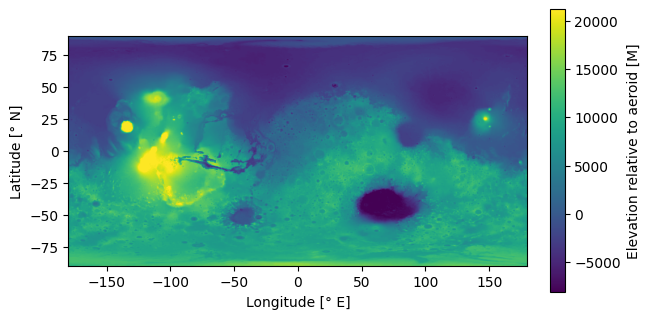

In [34]:
fig, ax = plt.subplots(layout="constrained")
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90])

# shrink the colour scale
fig.colorbar(im, label="Elevation relative to aeroid [M]",
             shrink=0.6)

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")

We can also control the colorbar location by adding on a separate axis or interacting with axis parameters. Try each of these with the aspect ratio set to auto and switched off to see how they might function on non-image data with a flexible pixel shape.

Text(0, 0.5, 'Latitude [° N]')

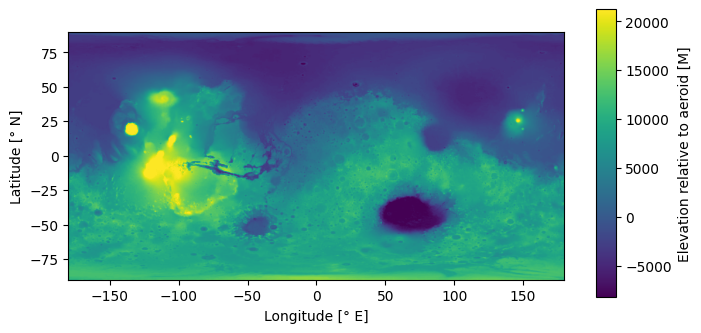

In [48]:
# solution: add an axis and specify location
# test the behaviour of changing the co-ordinates for the colorbar axis

fig, ax = plt.subplots()
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90])

# add an ax specifically for the colourbar
cb_ax = fig.add_axes([0.95, 0.2, 0.03, 0.6])
# assign the colour bar to the correct ax
fig.colorbar(im, label="Elevation relative to aeroid [M]", cax=)

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")

## The best automatic solution

A slightly elaborate solution based on [inset axes](https://matplotlib.org/stable/gallery/axes_grid1/demo_colorbar_with_inset_locator.html), from an answer on [StackOverflow](https://stackoverflow.com/a/63956844).


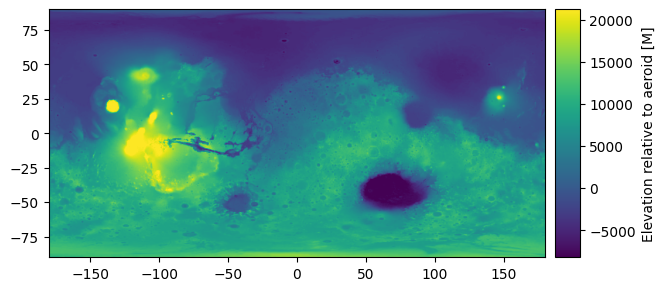

In [58]:
# import this additional library
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots()
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90])

# add cb_ax
cb_ax = inset_axes(ax, width = "5%", height = "100%", loc = 'lower left',
                   bbox_to_anchor = (1.02, 0., 1, 1), bbox_transform = ax.transAxes,
                   borderpad = 0)

fig.colorbar(im, label="Elevation relative to aeroid [M]", cax=cb_ax)

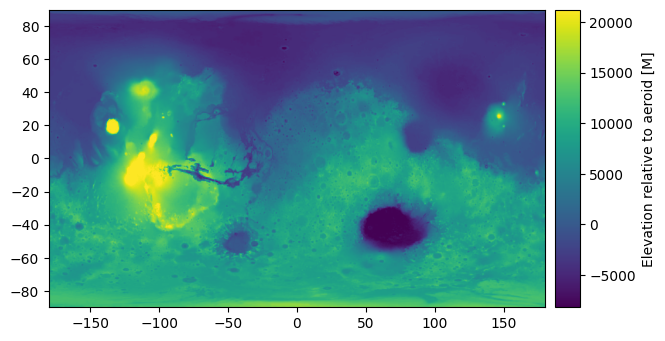

In [59]:
# this solution also works if you need to adjust the aspect ratio manually

aspect_ratio = 1.2

fig, ax = plt.subplots()
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90],
               aspect=aspect_ratio)

# add cb_ax
cb_ax = inset_axes(ax, width = "5%", height = "100%", loc = 'lower left',
                   bbox_to_anchor = (1.02, 0., 1, 1), bbox_transform = ax.transAxes,
                   borderpad = 0)

fig.colorbar(im, label="Elevation relative to aeroid [M]", cax=cb_ax)

But what does *bbox_to_anchor* and *bbox_transform = ax.transAxes* mean?

These essentially provide co-ordinates and a co-ordinate system for the inset axes, relative to the pre-existing axes.

- *bbox_to_anchor* The location on the pre-existing ax you want the new object to be anchored ([see the legend docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend))
- *bbox_transform = ax.transAxes*: this means that you are scaling the values provided in *bbox_to_anchor* to axes co-ordinates, not data co-ordinates: so the lower left of the plot is [0,0] and the upper right is [1,1] regardless of the scale of the data. Using axes co-ordinates makes your plotting functions more reuseable as they will work for different datasets and scale appropriately.


We'll use these further in the "lcoating legends" section before, but first let's explore some of the colourmaps we have available in Python!

### Choosing an appropriate colour map


There are many, many, many different choices of heatmap available across multiple different libraries. Let's first look at those availabl in Matplotlib and seaborn.

- [Matplotlib colours](https://matplotlib.org/stable/users/explain/colors/colormaps.html)
- [Seaborn colours](https://seaborn.pydata.org/tutorial/color_palettes.html)

Text(0, 0.5, 'Latitude [° N]')

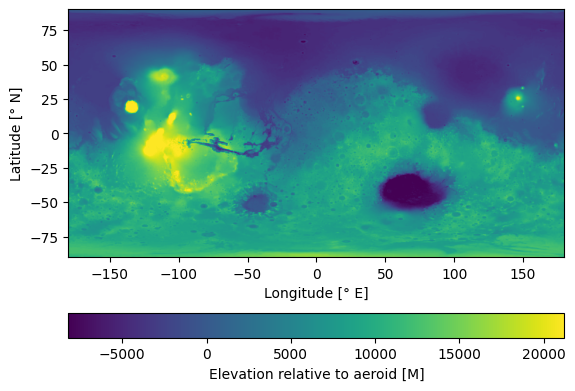

In [133]:
# our basic elevation map
fig, ax = plt.subplots()
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90])

# rotate the colour scale
fig.colorbar(im, label="Elevation relative to aeroid [M]",
             orientation="horizontal", )

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")

Text(0, 0.5, 'Latitude [° N]')

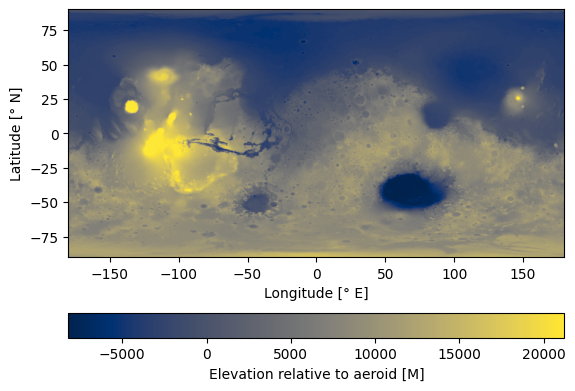

In [134]:
# set the colour map to "cividis"

# our basic elevation map
fig, ax = plt.subplots()

# change the colour map
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90],
               cmap=)

# rotate the colour scale
fig.colorbar(im, label="Elevation relative to aeroid [M]",
             orientation="horizontal", )

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")

Text(0, 0.5, 'Latitude [° N]')

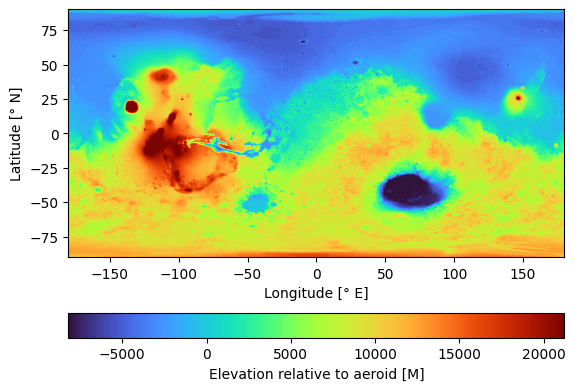

In [138]:
# try the turbo colour map
# our basic elevation map
fig, ax = plt.subplots()
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90],
                )

# rotate the colour scale
fig.colorbar(im, label="Elevation relative to aeroid [M]",
             orientation="horizontal",)

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")

Let's import seaborn to try out some of their colour maps



Text(0, 0.5, 'Latitude [° N]')

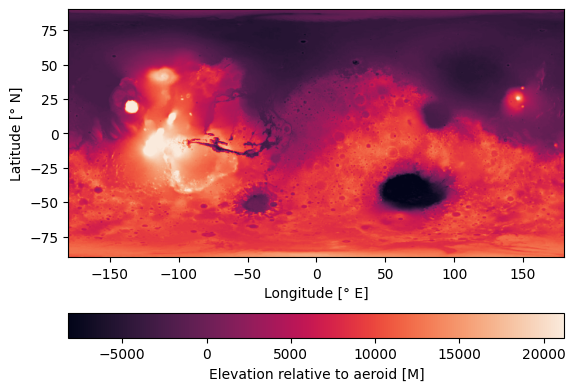

In [140]:
import seaborn as sns

# our basic elevation map
fig, ax = plt.subplots()
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90],
                cmap=sns.color_palette("rocket", as_cmap=True))

# rotate the colour scale
fig.colorbar(im, label="Elevation relative to aeroid [M]",
             orientation="horizontal",)

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")

Text(0, 0.5, 'Latitude [° N]')

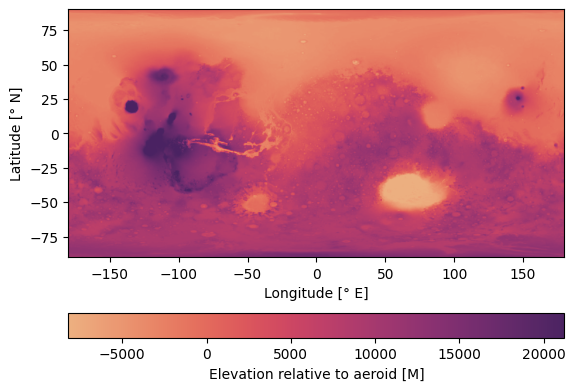

In [141]:
# try the seaborn "flare" colour map
# our basic elevation map
fig, ax = plt.subplots()
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90],
                )

# rotate the colour scale
fig.colorbar(im, label="Elevation relative to aeroid [M]",
             orientation="horizontal",)

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")

What's the difference between the rocket and flare heatmaps (see [documentation here](https://seaborn.pydata.org/tutorial/color_palettes.html#perceptually-uniform-palettes))? Why might this be useful?

There are a range of other useful colour maps available in packages such as [Scientific colour maps](https://github.com/callumrollo/cmcrameri), [cmasher](https://cmasher.readthedocs.io/), [palettable](https://jiffyclub.github.io/palettable/), [colorcet](https://colorcet.holoviz.org/), [cmocean](https://matplotlib.org/cmocean/), [SciCoMap](https://github.com/ThomasBury/scicomap).

Let's use some of the more unusual maps in cmocean.



In [153]:
!pip install cmocean
import cmocean

Text(0, 0.5, 'Latitude [° N]')

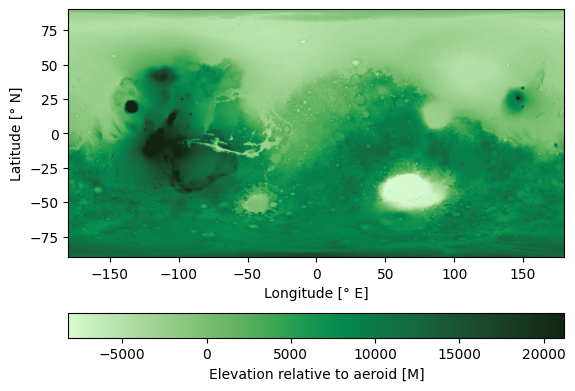

In [154]:
# pick a colour map: https://matplotlib.org/cmocean/

# our basic elevation map
fig, ax = plt.subplots()
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90],
                cmap=cmocean.cm.algae)

# rotate the colour scale
fig.colorbar(im, label="Elevation relative to aeroid [M]",
             orientation="horizontal",)

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")

Text(0, 0.5, 'Latitude [° N]')

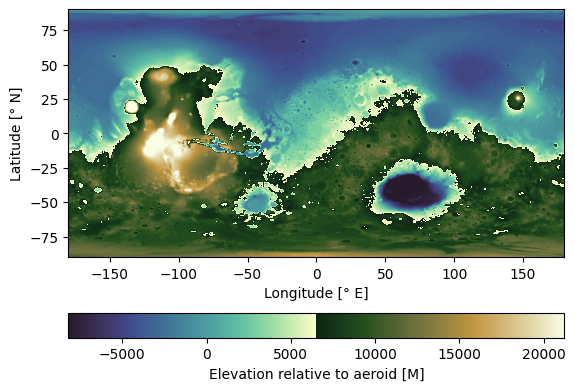

In [155]:
# pick a colour map: https://matplotlib.org/cmocean/

# our basic elevation map
fig, ax = plt.subplots()
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90],
                cmap=)

# rotate the colour scale
fig.colorbar(im, label="Elevation relative to aeroid [M]",
             orientation="horizontal",)

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")

If we want to use a map like "topo", we need to [centre](https://matplotlib.org/cmocean/#clipping-a-colormap) this colour map to fit our data better.

Text(0, 0.5, 'Latitude [° N]')

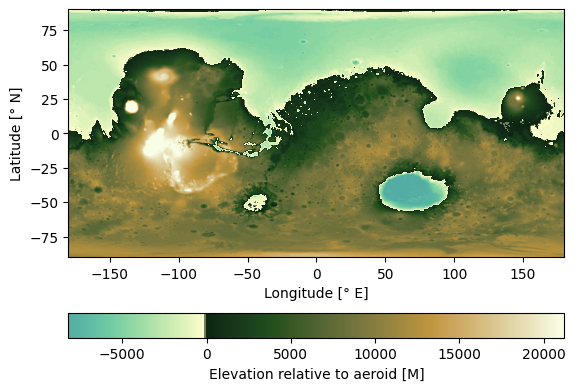

In [161]:
# pick a colour map: https://matplotlib.org/cmocean/
# set max and min values
min_val = image_scaled.min()
max_val = image_scaled.max()

newcmap = cmocean.tools.crop(cmocean.cm.topo, min_val, max_val, 0)

# our basic elevation map
fig, ax = plt.subplots()
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90],
                cmap=)

# rotate the colour scale
fig.colorbar(im, label="Elevation relative to aeroid [M]",
             orientation="horizontal",)

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")

Text(0, 0.5, 'Latitude [° N]')

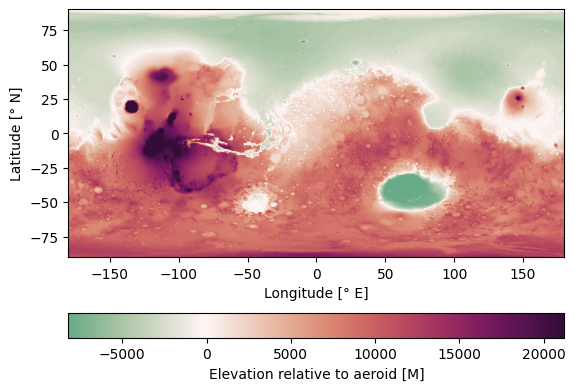

In [162]:
# pick a colour map: https://matplotlib.org/cmocean/
# set max and min values
min_val = image_scaled.min()
max_val = image_scaled.max()

# pick a different colour map
newcmap = cmocean.tools.crop(    , min_val, max_val, 0)

# our basic elevation map
fig, ax = plt.subplots()
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90],
                cmap=)

# rotate the colour scale
fig.colorbar(im, label="Elevation relative to aeroid [M]",
             orientation="horizontal",)

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")

## Locating legends

We can use the steps we took to define the location of the colourbar to place a legend box as well. Let's add some points to our map and then create a legend for them.

Text(0, 0.5, 'Latitude [° N]')

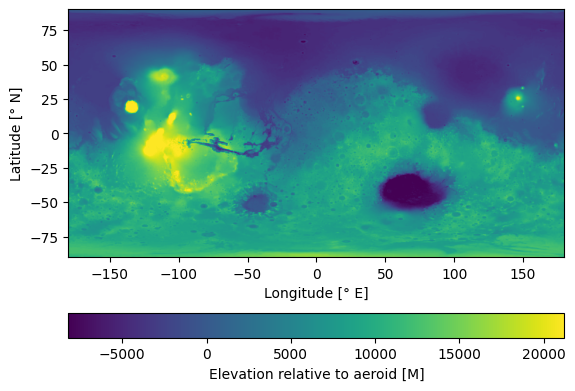

In [60]:
# our basic elevation map
fig, ax = plt.subplots()
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90])

# rotate the colour scale
fig.colorbar(im, label="Elevation relative to aeroid [M]",
             orientation="horizontal", )

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")

Text(0, 0.5, 'Latitude [° N]')

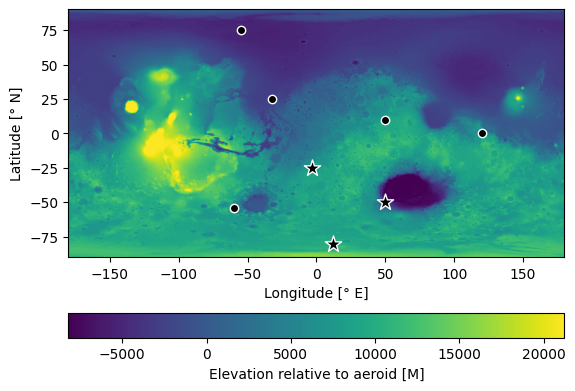

In [68]:
# our basic elevation map
fig, ax = plt.subplots()
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90])

# add data points
long_set_1 = [-55, -60, -32, 120, 50]
lat_set_1 = [75, -54, 25, 0, 10]

long_set_2 = [12, 50, -3]
lat_set_2 = [-80, -50, -25]

# plot these points
ax.scatter(long_set_1 , lat_set_1,
           marker="o", c="black", edgecolor="white" )

ax.scatter(long_set_2 , lat_set_2,
           marker="*", c="black", edgecolor="white", s=150)

# rotate the colour scale
fig.colorbar(im, label="Elevation relative to aeroid [M]",
             orientation="horizontal", )

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")

Text(0, 0.5, 'Latitude [° N]')

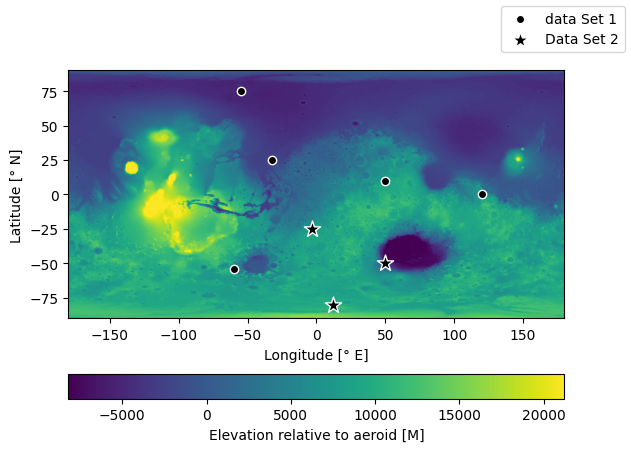

In [70]:
# our basic elevation map
fig, ax = plt.subplots()
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90])

# add data points
long_set_1 = [-55, -60, -32, 120, 50]
lat_set_1 = [75, -54, 25, 0, 10]

long_set_2 = [12, 50, -3]
lat_set_2 = [-80, -50, -25]

# plot these points
ax.scatter(long_set_1 , lat_set_1,
           marker="o", c="black", edgecolor="white",
           label="Data Set 1")

ax.scatter(long_set_2 , lat_set_2,
           marker="*", c="black", edgecolor="white", s=150,
           label="Data Set 2")

# rotate the colour scale
fig.colorbar(im, label="Elevation relative to aeroid [M]",
             orientation="horizontal", )

# add a figure legend

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")

We use *loc* and *bbox to anchor* together to define the location of the legend([docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend)).

To attempt to automatically fit the legend in the best location of the lower right quadrant of the figure, use the following:

```
loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5)
```
This defines an area of the plot given by *(x loc, y loc, width, height)*.

Whereas if you want to anchor a specific part of the legend (selected using *loc*) to a specific point on the axes, use a *tuple* that denotes *(x loc, y loc)*:

```
loc='upper right', bbox_to_anchor=(0.5, 0.5)
```

First, let's set the legend to use two columns.



Text(0, 0.5, 'Latitude [° N]')

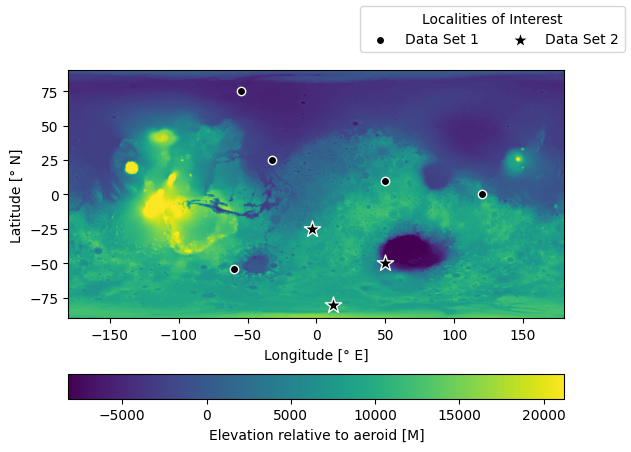

In [72]:
# we can move the legend and define number of columns and title
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend

# our basic elevation map
fig, ax = plt.subplots()
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90])

# add data points
long_set_1 = [-55, -60, -32, 120, 50]
lat_set_1 = [75, -54, 25, 0, 10]

long_set_2 = [12, 50, -3]
lat_set_2 = [-80, -50, -25]

# plot these points
ax.scatter(long_set_1 , lat_set_1,
           marker="o", c="black", edgecolor="white",
           label="Data Set 1")

ax.scatter(long_set_2 , lat_set_2,
           marker="*", c="black", edgecolor="white", s=150,
           label="Data Set 2")

# rotate the colour scale
fig.colorbar(im, label="Elevation relative to aeroid [M]",
             orientation="horizontal", )

# change the title and add to the number of cols in the legend

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")

Text(0, 0.5, 'Latitude [° N]')

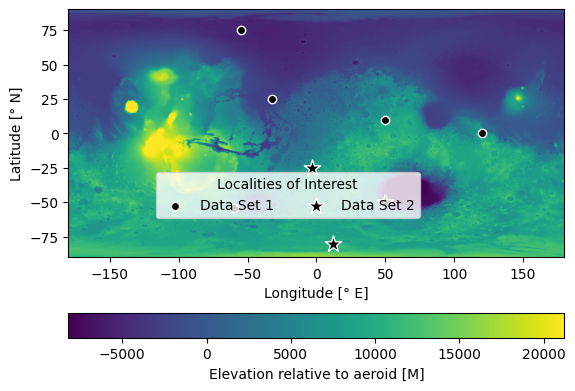

In [74]:
# we can move the legend and define number of columns and title
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend

# our basic elevation map
fig, ax = plt.subplots()
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90])

# add data points
long_set_1 = [-55, -60, -32, 120, 50]
lat_set_1 = [75, -54, 25, 0, 10]

long_set_2 = [12, 50, -3]
lat_set_2 = [-80, -50, -25]

# plot these points
ax.scatter(long_set_1 , lat_set_1,
           marker="o", c="black", edgecolor="white",
           label="Data Set 1")

ax.scatter(long_set_2 , lat_set_2,
           marker="*", c="black", edgecolor="white", s=150,
           label="Data Set 2")

# rotate the colour scale
fig.colorbar(im, label="Elevation relative to aeroid [M]",
             orientation="horizontal", )


# without bbox_to_anchor, the loc keyword tries to find a suitable position
# for the legend in the region specified

# try different locations
fig.legend(ncols=2, title="Localities of Interest",
           loc="center",)

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")

Text(0, 0.5, 'Latitude [° N]')

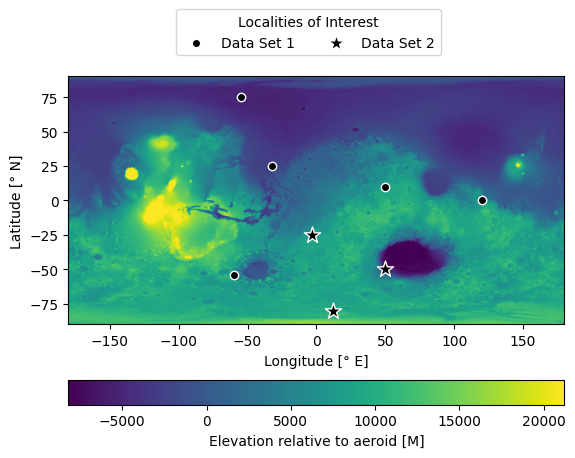

In [79]:
# we can move the legend and define number of columns and title
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend

# our basic elevation map
fig, ax = plt.subplots()
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90])

# add data points
long_set_1 = [-55, -60, -32, 120, 50]
lat_set_1 = [75, -54, 25, 0, 10]

long_set_2 = [12, 50, -3]
lat_set_2 = [-80, -50, -25]

# plot these points
ax.scatter(long_set_1 , lat_set_1,
           marker="o", c="black", edgecolor="white",
           label="Data Set 1")

ax.scatter(long_set_2 , lat_set_2,
           marker="*", c="black", edgecolor="white", s=150,
           label="Data Set 2")

# rotate the colour scale
fig.colorbar(im, label="Elevation relative to aeroid [M]",
             orientation="horizontal", )


# with bbox_to_anchor, the loc keyword pins that location of the legend
# (so in this case the centre) to the co-ordinates provided
# in this case, the co-ordinates are in respect to the figure
fig.legend(ncols=2, title="Localities of Interest",
           loc="center", bbox_to_anchor=(0.5, 0.95))

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")

Text(0, 0.5, 'Latitude [° N]')

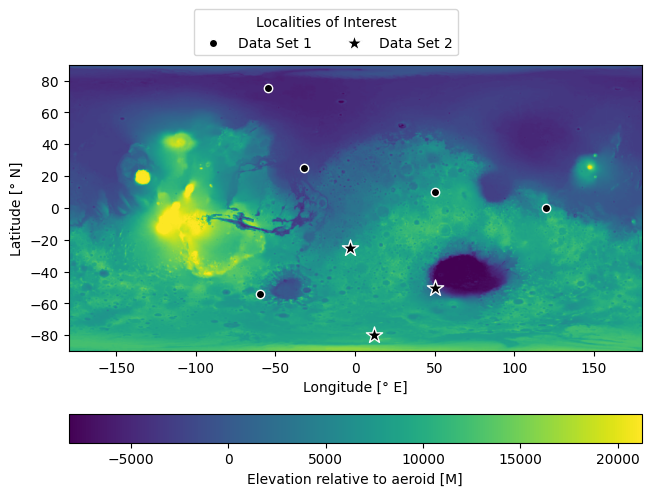

In [81]:
# we can move the legend and define number of columns and title
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend

# our basic elevation map
# we can use constrained layout to optimize the use of space
fig, ax = plt.subplots(layout="constrained")
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90])

# add data points
long_set_1 = [-55, -60, -32, 120, 50]
lat_set_1 = [75, -54, 25, 0, 10]

long_set_2 = [12, 50, -3]
lat_set_2 = [-80, -50, -25]

# plot these points
ax.scatter(long_set_1 , lat_set_1,
           marker="o", c="black", edgecolor="white",
           label="Data Set 1")

ax.scatter(long_set_2 , lat_set_2,
           marker="*", c="black", edgecolor="white", s=150,
           label="Data Set 2")

# rotate the colour scale
fig.colorbar(im, label="Elevation relative to aeroid [M]",
             orientation="horizontal", )


# with bbox_to_anchor, the loc keyword pins that location of the legend
# (so in this case the centre) to the co-ordinates provided
# in this case, the co-ordinates are in respect to the figure

# try moving the legend
fig.legend(ncols=2, title="Localities of Interest",
           loc="center", bbox_to_anchor=(0.5, 0.95))

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")

Text(0, 0.5, 'Latitude [° N]')

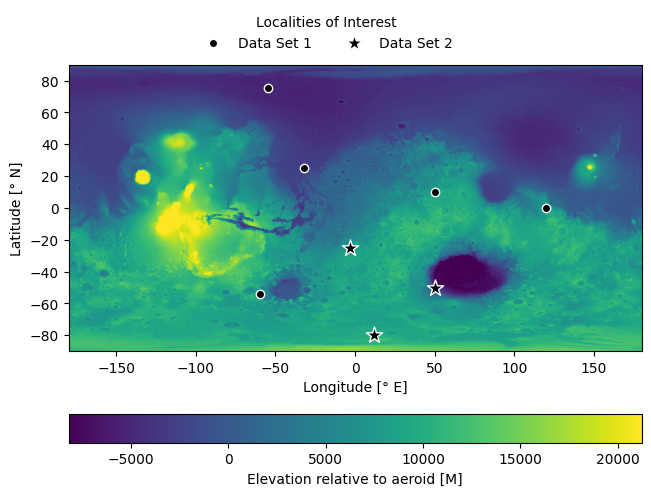

In [83]:
# we can move the legend and define number of columns and title
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend


fig, ax = plt.subplots(layout="constrained")
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90])

# add data points
long_set_1 = [-55, -60, -32, 120, 50]
lat_set_1 = [75, -54, 25, 0, 10]

long_set_2 = [12, 50, -3]
lat_set_2 = [-80, -50, -25]

# plot these points
ax.scatter(long_set_1 , lat_set_1,
           marker="o", c="black", edgecolor="white",
           label="Data Set 1")

ax.scatter(long_set_2 , lat_set_2,
           marker="*", c="black", edgecolor="white", s=150,
           label="Data Set 2")

# rotate the colour scale
fig.colorbar(im, label="Elevation relative to aeroid [M]",
             orientation="horizontal", )


#lets remove the frame around the legend
fig.legend(ncols=2, title="Localities of Interest",
           loc="center", bbox_to_anchor=(0.5, 0.95),
           frameon=)

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")


Compare the save output with *layout = "constrained"* and without.

While we're not setting it here, you should of course consider what figure size to use.

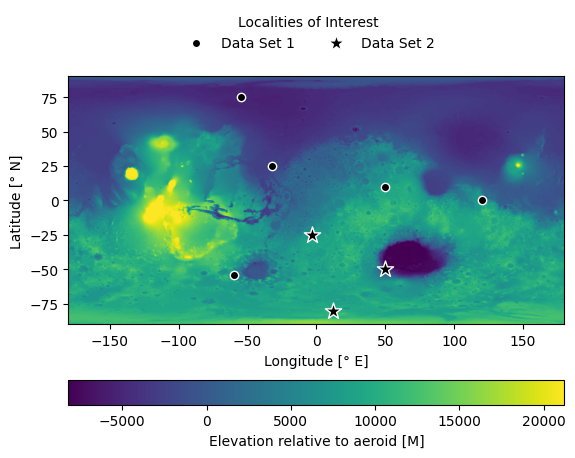

In [86]:
# how does contrained layout change the saved image?

fig, ax = plt.subplots()#layout="constrained")
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90])

# add data points
long_set_1 = [-55, -60, -32, 120, 50]
lat_set_1 = [75, -54, 25, 0, 10]

long_set_2 = [12, 50, -3]
lat_set_2 = [-80, -50, -25]

# plot these points
ax.scatter(long_set_1 , lat_set_1,
           marker="o", c="black", edgecolor="white",
           label="Data Set 1")

ax.scatter(long_set_2 , lat_set_2,
           marker="*", c="black", edgecolor="white", s=150,
           label="Data Set 2")

# rotate the colour scale
fig.colorbar(im, label="Elevation relative to aeroid [M]",
             orientation="horizontal", )


#lets remove the frame around the legend
fig.legend(ncols=2, title="Localities of Interest",
           loc="center", bbox_to_anchor=(0.5, 0.95),
           frameon=False)

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")

fig.savefig("Example_mars_01.png")

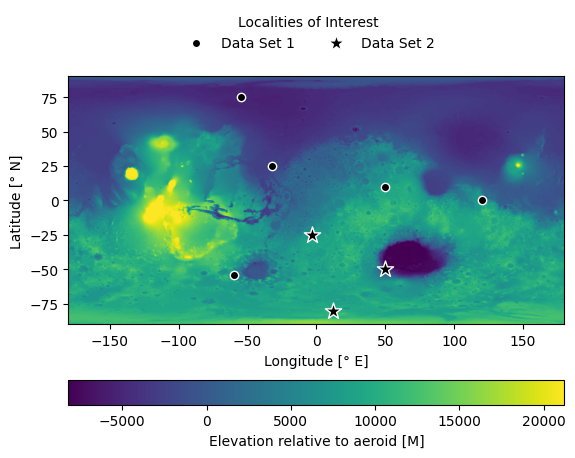

In [88]:
# a "tight" layout can also be passed to the figure,
# how does this change the saved image?

fig, ax = plt.subplots()#layout="constrained")
im = ax.imshow(image_scaled, extent=[-180, 180, -90, 90])

# add data points
long_set_1 = [-55, -60, -32, 120, 50]
lat_set_1 = [75, -54, 25, 0, 10]

long_set_2 = [12, 50, -3]
lat_set_2 = [-80, -50, -25]

# plot these points
ax.scatter(long_set_1 , lat_set_1,
           marker="o", c="black", edgecolor="white",
           label="Data Set 1")

ax.scatter(long_set_2 , lat_set_2,
           marker="*", c="black", edgecolor="white", s=150,
           label="Data Set 2")

# rotate the colour scale
fig.colorbar(im, label="Elevation relative to aeroid [M]",
             orientation="horizontal", )


#lets remove the frame around the legend
fig.legend(ncols=2, title="Localities of Interest",
           loc="center", bbox_to_anchor=(0.5, 0.95),
           frameon=False)

ax.set_xlabel("Longitude [° E]")
ax.set_ylabel("Latitude [° N]")

fig.savefig("Example_mars_01.png",
            bbox_inches="tight")

### Axes level legends

Above, we used a figure-level legend. Let's briefly look at how we might go about creating an axes level legend.

We'll look at some of the drawbacks of using "constrained layout" in a grid of subplots.

We're also going to use "axes divider" to split the upper divider to add some room for the colour bar.

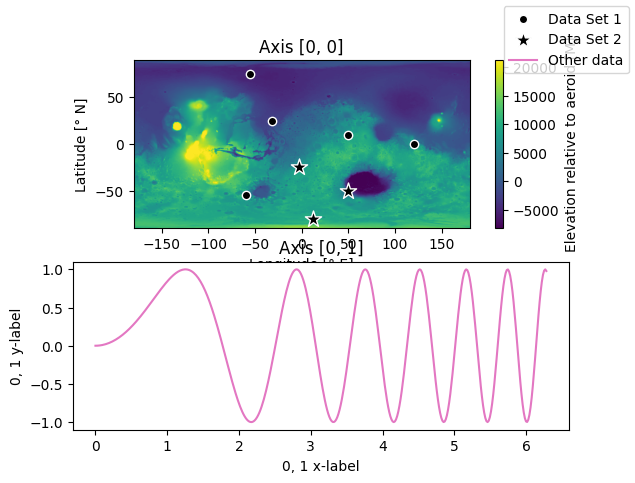

In [105]:

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# add data points
long_set_1 = [-55, -60, -32, 120, 50]
lat_set_1 = [75, -54, 25, 0, 10]

long_set_2 = [12, 50, -3]
lat_set_2 = [-80, -50, -25]


# Set up figure with 2 rows and 1 column
fig, axs = plt.subplots(2, 1,)

im = axs[0].imshow(image_scaled, extent=[-180, 180, -90, 90])
axs[0].set_title('Axis [0, 0]')
axs[0].set(xlabel='Longitude [° E]', ylabel='Latitude [° N]')

# plot these points
axs[0].scatter(long_set_1 , lat_set_1,
           marker="o", c="black", edgecolor="white",
           label="Data Set 1")

axs[0].scatter(long_set_2 , lat_set_2,
           marker="*", c="black", edgecolor="white", s=150,
           label="Data Set 2")

fig.colorbar(im, label="Elevation relative to aeroid [M]",)

axs[1].plot(x, y, 'tab:pink', label="Other data")
axs[1].set_title('Axis [0, 1]')
axs[1].set(xlabel='0, 1 x-label', ylabel='0, 1 y-label')

fig.legend()



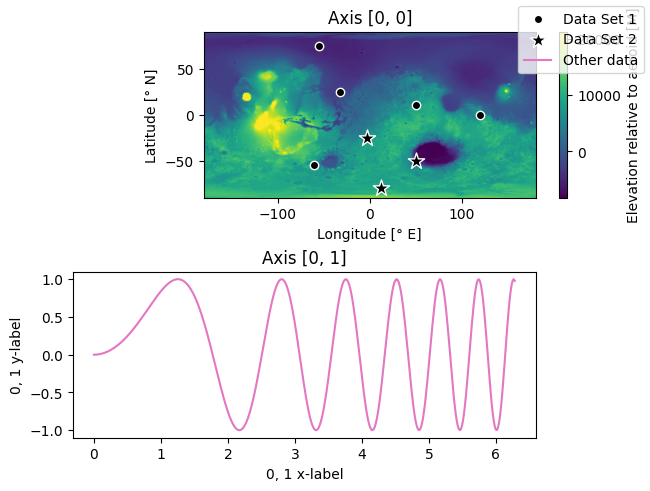

In [107]:
# try constrained layout to fix the overlapping text
# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# add data points
long_set_1 = [-55, -60, -32, 120, 50]
lat_set_1 = [75, -54, 25, 0, 10]

long_set_2 = [12, 50, -3]
lat_set_2 = [-80, -50, -25]


# constrained layout
fig, axs = plt.subplots(2, 1, layout=)

im = axs[0].imshow(image_scaled, extent=[-180, 180, -90, 90])
axs[0].set_title('Axis [0, 0]')
axs[0].set(xlabel='Longitude [° E]', ylabel='Latitude [° N]')

# plot these points
axs[0].scatter(long_set_1 , lat_set_1,
           marker="o", c="black", edgecolor="white",
           label="Data Set 1")

axs[0].scatter(long_set_2 , lat_set_2,
           marker="*", c="black", edgecolor="white", s=150,
           label="Data Set 2")

fig.colorbar(im, label="Elevation relative to aeroid [M]",)

axs[1].plot(x, y, 'tab:pink', label="Other data")
axs[1].set_title('Axis [0, 1]')
axs[1].set(xlabel='0, 1 x-label', ylabel='0, 1 y-label')

fig.legend()

While there's no longer overlap, the layout of this plot isn't what I wanted.

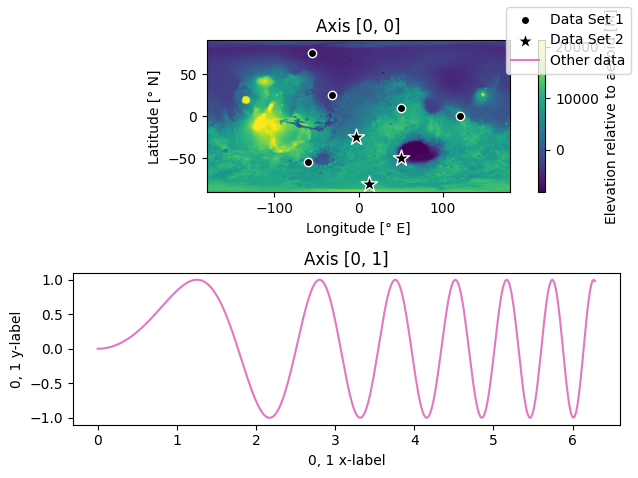

In [108]:
# try tight layout to fix the overlapping text
# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# add data points
long_set_1 = [-55, -60, -32, 120, 50]
lat_set_1 = [75, -54, 25, 0, 10]

long_set_2 = [12, 50, -3]
lat_set_2 = [-80, -50, -25]


# tight layout
fig, axs = plt.subplots(2, 1, layout=)

im = axs[0].imshow(image_scaled, extent=[-180, 180, -90, 90])
axs[0].set_title('Axis [0, 0]')
axs[0].set(xlabel='Longitude [° E]', ylabel='Latitude [° N]')

# plot these points
axs[0].scatter(long_set_1 , lat_set_1,
           marker="o", c="black", edgecolor="white",
           label="Data Set 1")

axs[0].scatter(long_set_2 , lat_set_2,
           marker="*", c="black", edgecolor="white", s=150,
           label="Data Set 2")

fig.colorbar(im, label="Elevation relative to aeroid [M]",)

axs[1].plot(x, y, 'tab:pink', label="Other data")
axs[1].set_title('Axis [0, 1]')
axs[1].set(xlabel='0, 1 x-label', ylabel='0, 1 y-label')

fig.legend()

The tight layout option changes the layout, but it's still not what I wanted. See [the docs here](https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html) that discuss these layout options.

Let's try dividing the top axes to get full control of the colour scale location.

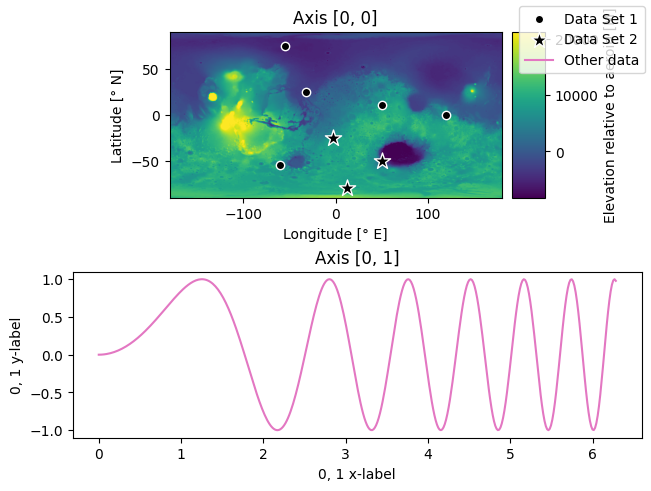

In [111]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# try constrained layout to fix the overlapping text
# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# add data points
long_set_1 = [-55, -60, -32, 120, 50]
lat_set_1 = [75, -54, 25, 0, 10]

long_set_2 = [12, 50, -3]
lat_set_2 = [-80, -50, -25]


# constrained layout
fig, axs = plt.subplots(2, 1, layout="constrained")

im = axs[0].imshow(image_scaled, extent=[-180, 180, -90, 90])
axs[0].set_title('Axis [0, 0]')
axs[0].set(xlabel='Longitude [° E]', ylabel='Latitude [° N]')

# plot these points
axs[0].scatter(long_set_1 , lat_set_1,
           marker="o", c="black", edgecolor="white",
           label="Data Set 1")

axs[0].scatter(long_set_2 , lat_set_2,
           marker="*", c="black", edgecolor="white", s=150,
           label="Data Set 2")

divider = make_axes_locatable(axs[0])

cb_ax = divider.append_axes("right",
                            size="10%",
                            pad=0.1)

fig.colorbar(im, label="Elevation relative to aeroid [M]",
             cax=cb_ax)

axs[1].plot(x, y, 'tab:pink', label="Other data")
axs[1].set_title('Axis [0, 1]')
axs[1].set(xlabel='0, 1 x-label', ylabel='0, 1 y-label')

fig.legend()

Ok, the figure is now looking how I wanted, let's move the legend.

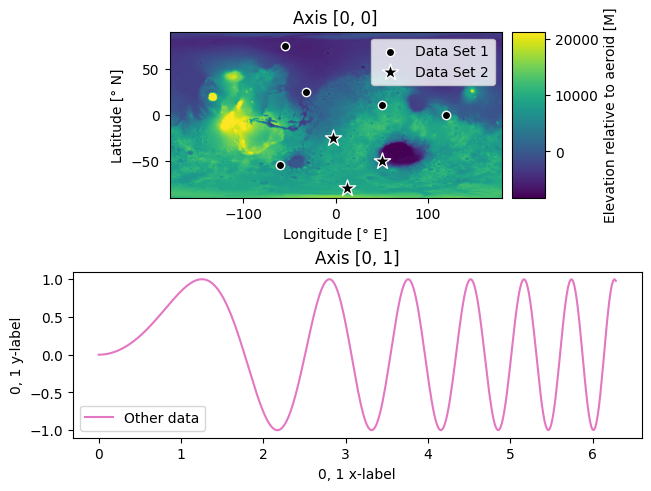

In [114]:
# try constrained layout to fix the overlapping text
# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# add data points
long_set_1 = [-55, -60, -32, 120, 50]
lat_set_1 = [75, -54, 25, 0, 10]

long_set_2 = [12, 50, -3]
lat_set_2 = [-80, -50, -25]


# constrained layout
fig, axs = plt.subplots(2, 1, layout="constrained")

im = axs[0].imshow(image_scaled, extent=[-180, 180, -90, 90])
axs[0].set_title('Axis [0, 0]')
axs[0].set(xlabel='Longitude [° E]', ylabel='Latitude [° N]')

# plot these points
axs[0].scatter(long_set_1 , lat_set_1,
           marker="o", c="black", edgecolor="white",
           label="Data Set 1")

axs[0].scatter(long_set_2 , lat_set_2,
           marker="*", c="black", edgecolor="white", s=150,
           label="Data Set 2")

divider = make_axes_locatable(axs[0])

cb_ax = divider.append_axes("right",
                            size="10%",
                            pad=0.1)

fig.colorbar(im, label="Elevation relative to aeroid [M]",
             cax=cb_ax)

axs[1].plot(x, y, 'tab:pink', label="Other data")
axs[1].set_title('Axis [0, 1]')
axs[1].set(xlabel='0, 1 x-label', ylabel='0, 1 y-label')

# remove the figure level legend
# fig.legend()

# add an ax level legend for each axes

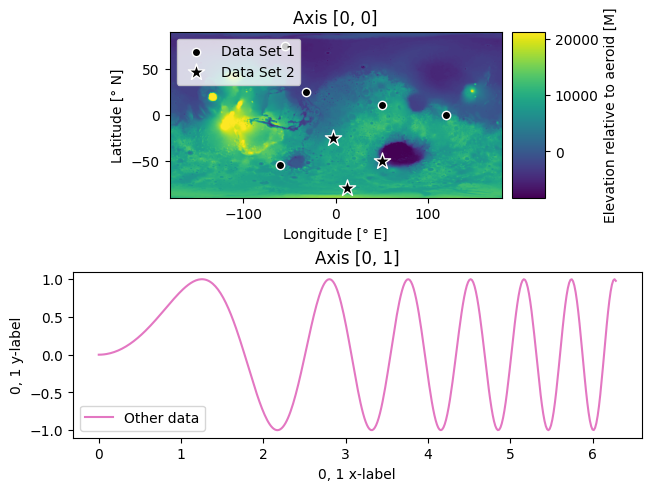

In [117]:
# try constrained layout to fix the overlapping text
# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# add data points
long_set_1 = [-55, -60, -32, 120, 50]
lat_set_1 = [75, -54, 25, 0, 10]

long_set_2 = [12, 50, -3]
lat_set_2 = [-80, -50, -25]


# constrained layout
fig, axs = plt.subplots(2, 1, layout="constrained")

im = axs[0].imshow(image_scaled, extent=[-180, 180, -90, 90])
axs[0].set_title('Axis [0, 0]')
axs[0].set(xlabel='Longitude [° E]', ylabel='Latitude [° N]')

# plot these points
axs[0].scatter(long_set_1 , lat_set_1,
           marker="o", c="black", edgecolor="white",
           label="Data Set 1")

axs[0].scatter(long_set_2 , lat_set_2,
           marker="*", c="black", edgecolor="white", s=150,
           label="Data Set 2")

divider = make_axes_locatable(axs[0])

cb_ax = divider.append_axes("right",
                            size="10%",
                            pad=0.1)

fig.colorbar(im, label="Elevation relative to aeroid [M]",
             cax=cb_ax)

axs[1].plot(x, y, 'tab:pink', label="Other data")
axs[1].set_title('Axis [0, 1]')
axs[1].set(xlabel='0, 1 x-label', ylabel='0, 1 y-label')

# remove the figure level legend
# fig.legend()

# what effect does loc have on the ax level legend object?


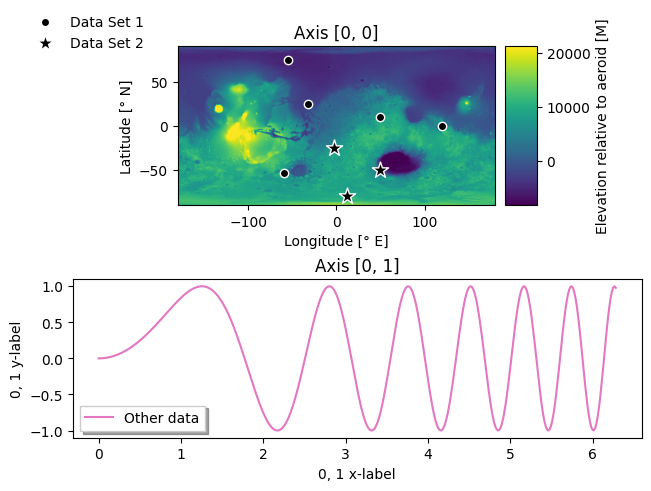

In [132]:
# try constrained layout to fix the overlapping text
# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# add data points
long_set_1 = [-55, -60, -32, 120, 50]
lat_set_1 = [75, -54, 25, 0, 10]

long_set_2 = [12, 50, -3]
lat_set_2 = [-80, -50, -25]


# constrained layout
fig, axs = plt.subplots(2, 1, layout="constrained")

im = axs[0].imshow(image_scaled, extent=[-180, 180, -90, 90])
axs[0].set_title('Axis [0, 0]')
axs[0].set(xlabel='Longitude [° E]', ylabel='Latitude [° N]')

# plot these points
axs[0].scatter(long_set_1 , lat_set_1,
           marker="o", c="black", edgecolor="white",
           label="Data Set 1")

axs[0].scatter(long_set_2 , lat_set_2,
           marker="*", c="black", edgecolor="white", s=150,
           label="Data Set 2")

divider = make_axes_locatable(axs[0])

cb_ax = divider.append_axes("right",
                            size="10%",
                            pad=0.1)

fig.colorbar(im, label="Elevation relative to aeroid [M]",
             cax=cb_ax)

axs[1].plot(x, y, 'tab:pink', label="Other data")
axs[1].set_title('Axis [0, 1]')
axs[1].set(xlabel='0, 1 x-label', ylabel='0, 1 y-label')

# remove the figure level legend
# fig.legend()

# what effect does loc have on the ax level?
# loc="lower left", bbox_to_anchor= (-0.5, 0.9),

# let's leave this one where it is, but change some aesthetic settings
# fancybox=False, shadow=True